In [219]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [220]:
df = pd.read_csv('../../data/raw/integrated.csv')

df_1866_2024 = df.copy()

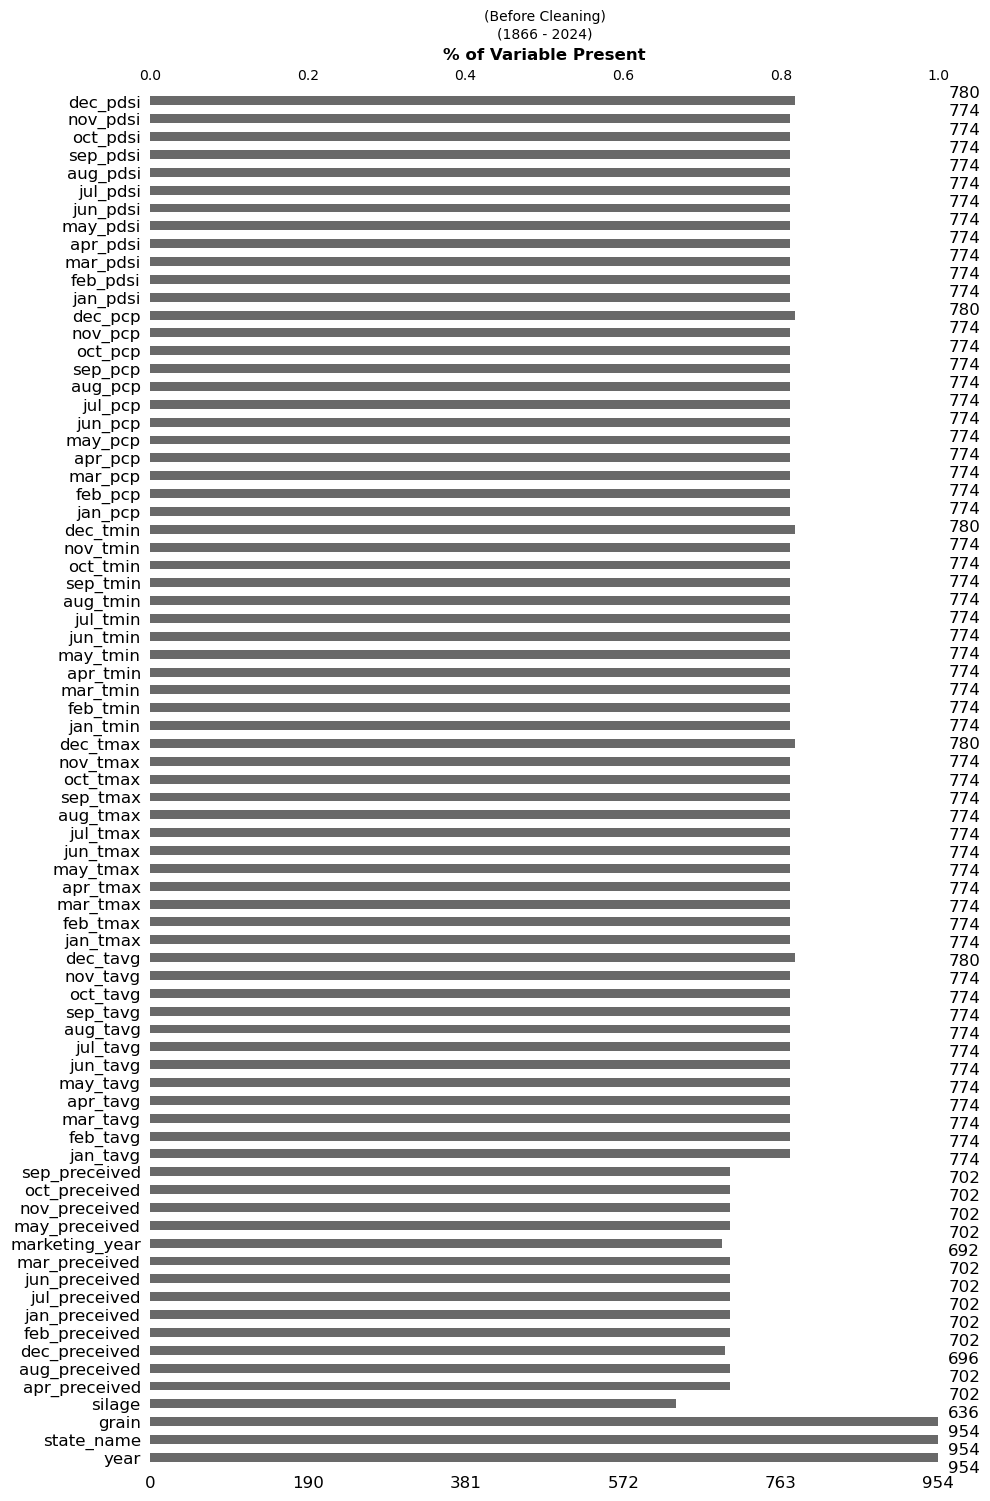

In [221]:
msno.bar(
    df_1866_2024,
    figsize=(10, 15),
    fontsize=12
)
plt.title('% of Variable Present', fontweight='bold')
plt.text(
    0.5, 80.5,
    f'(Before Cleaning)',
    horizontalalignment='center'
)
plt.text(
    0.5, 79.5,
    f'(1866 - 2024)',
    horizontalalignment='center'
)
plt.tight_layout()
plt.savefig(
    f'../../results/cleaning/raw_msno_bar.png'
)
plt.show()

In [222]:
df_1908_2024 = df[df['year'] >= 1908].copy()

df_missing = df_1908_2024.set_index(['year', 'state_name']).isna()
df_missing.replace(to_replace=True, value=1, inplace=True)
df_missing.replace(to_replace=False, value=0, inplace=True)
df_temp = df_missing.reset_index()

df_nan_grouped = df_temp.groupby(['year', 'state_name']).agg('sum').reset_index()
df_nan_grouped['nan_total'] = df_nan_grouped.iloc[:,2:].sum(axis=1)

/var/folders/j7/fswh0x992tzfxgs898w7vv9w0000gn/T/ipykernel_48221/3035759223.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_missing.replace(to_replace=False, value=0, inplace=True)


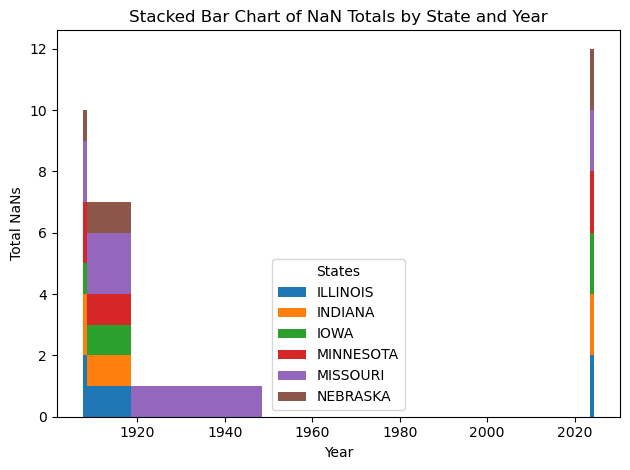

In [223]:
states = list(df_nan_grouped['state_name'].unique())
bottom = 0
fig, ax = plt.subplots()

for i, state in enumerate(states):

    df_temp = df_nan_grouped[df_nan_grouped['state_name'] == state]
    years = df_temp['year'].values
    
    ax.bar(
        x=years,
        height=df_temp['nan_total'],
        label=state,
        width=1,
        bottom=bottom
    )
    
    bottom += df_temp['nan_total'].values

ax.set_xlabel('Year')
ax.set_ylabel('Total NaNs')
ax.legend(title='States')
ax.set_title('Stacked Bar Chart of NaN Totals by State and Year')

plt.tight_layout()
plt.savefig('../../results/cleaning/stacked_bar.png')
plt.show()

In [224]:
df_1919_2023 = df_1908_2024[(df_1908_2024['year'] >= 1919) & (df_1908_2024['year'] <= 2023)]

for year in range(1919, 1949):
    avg = df_1919_2023[df_1919_2023['year'] == year]['marketing_year'].mean()
    df_1919_2023.loc[df_1919_2023[(df_1919_2023['state_name'] == 'MISSOURI') & (df_1919_2023['year'] == year)].index, 'marketing_year'] = avg

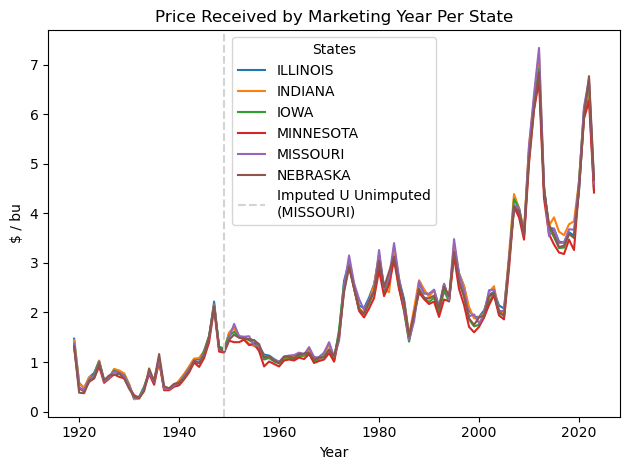

In [225]:
for state in states:
    df_temp = df_1919_2023[df_1919_2023['state_name'] == state]
    plt.plot(
        df_temp['year'],
        df_temp['marketing_year'],
        label=state
    )
plt.axvline(
    1949,
    color='lightgray',
    linestyle='--',
    label='Imputed U Unimputed\n(MISSOURI)'
)
plt.legend(title='States')
plt.title('Price Received by Marketing Year Per State')
plt.ylabel('$ / bu')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig('../../results/cleaning/preceived_marketing_year_plot.png')

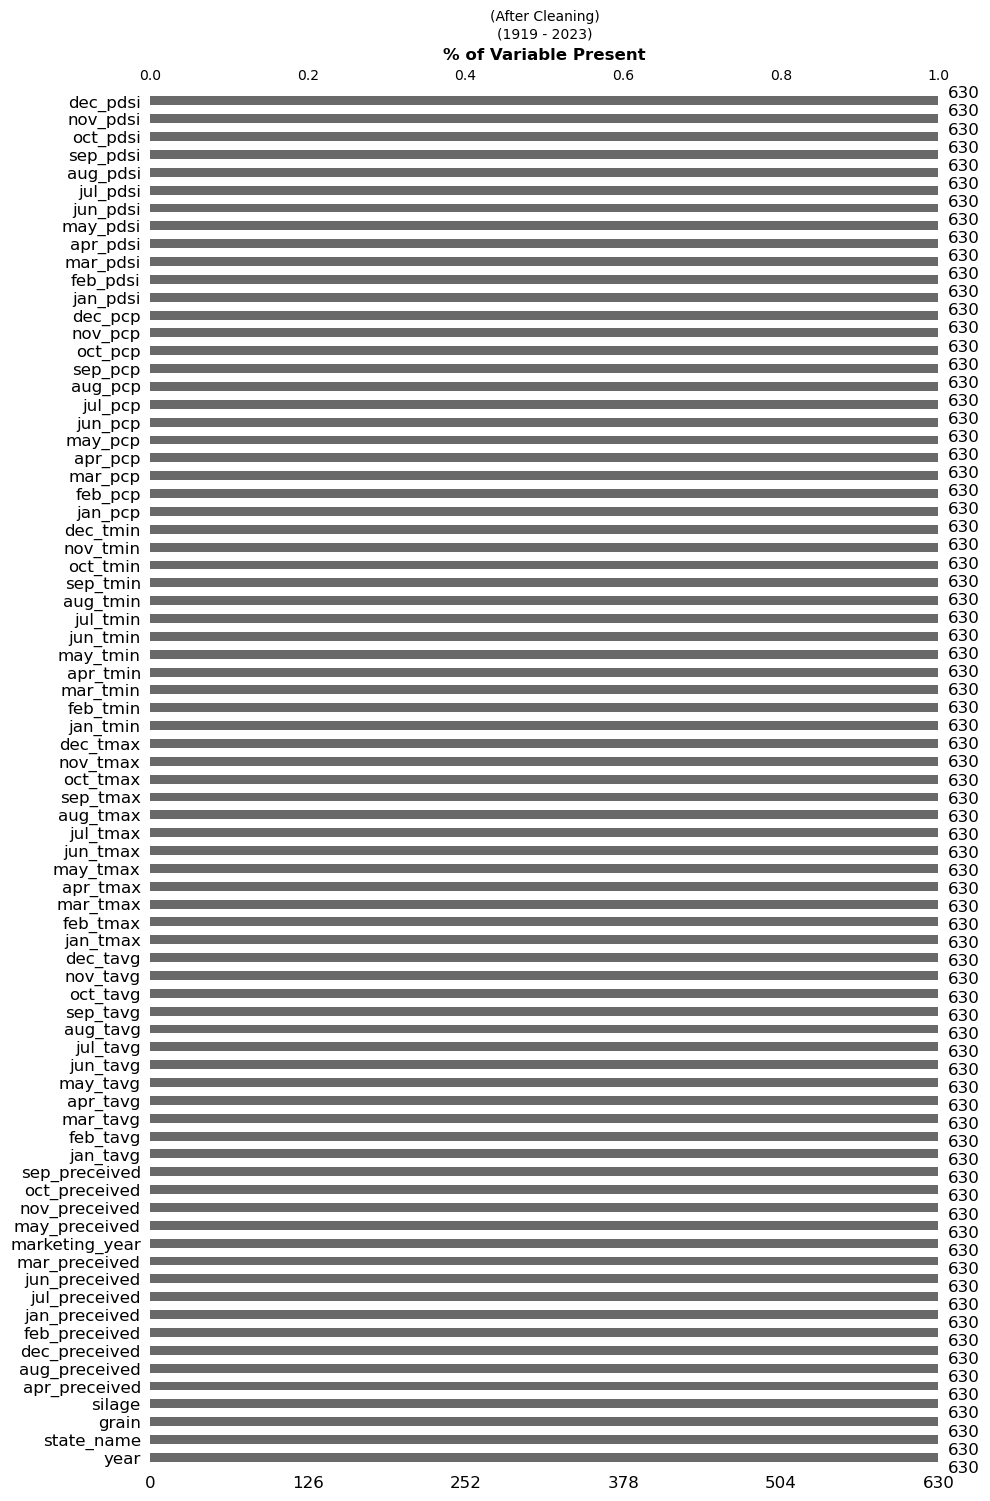

In [226]:
msno.bar(
    df_1919_2023,
    figsize=(10, 15),
    fontsize=12
)
plt.title('% of Variable Present', fontweight='bold')
plt.text(
    0.5, 80.5,
    f'(After Cleaning)',
    horizontalalignment='center'
)
plt.text(
    0.5, 79.5,
    f'(1919 - 2023)',
    horizontalalignment='center'
)
plt.tight_layout()
plt.savefig(
    f'../../results/cleaning/clean_msno_bar.png'
)
plt.show()

In [227]:
df_1919_2023.to_csv('../../data/clean/clean.csv', index=False)